In [1]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c hackathon-online-data-science-mini-epidemiology
!unzip /content/hackathon-online-data-science-mini-epidemiology.zip

ref                                                           title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
patricklford/global-ev-sales-2010-2024                        Global EV Sales: 2010-2024                        83KB  2024-07-19 13:40:22           1817         25  1.0              
marius2303/nissan-all-models-price-prediction-dataset         Nissan All Models Price Prediction Dataset       811KB  2024-07-27 11:50:10            891         24  1.0              
waqi786/global-air-quality-dataset                            Global Air Quality Dataset 🌍🌫️                   258KB  2024-07-28 10:35:09           1250         29  1.0              
waqi786/1000-richest-people-in-the-world                      1000 Richest People in 

In [2]:
import pandas as pd

In [5]:
train_df = pd.read_csv("/content/Train_set.csv")
test_df = pd.read_csv("/content/Test_set.csv")
submit_df = pd.read_csv("/content/sample_submission.csv")

In [10]:
train_df

,_id,Disease,Year,PROVINCE,Week_no,Count
0,1,Hand Foot Mouth,2013,Bangkok,1,62.0
1,2,Hand Foot Mouth,2013,Bangkok,2,95.0
2,3,Hand Foot Mouth,2013,Bangkok,3,88.0
3,4,Hand Foot Mouth,2013,Bangkok,4,86.0
4,5,Hand Foot Mouth,2013,Bangkok,5,132.0
...,...,...,...,...,...,...
32181,32182,Hand Foot Mouth,2020,Narathiwat,48,2.0
32182,32183,Hand Foot Mouth,2020,Narathiwat,49,1.0
32183,32184,Hand Foot Mouth,2020,Narathiwat,50,2.0
32184,32185,Hand Foot Mouth,2020,Narathiwat,51,2.0


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32186 entries, 0 to 32185
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   _id       32186 non-null  int64  
 1   Disease   32186 non-null  object 
 2   Year      32186 non-null  int64  
 3   PROVINCE  32186 non-null  object 
 4   Week_no   32186 non-null  int64  
 5   Count     32186 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.5+ MB


In [17]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
_id,32186.0,16093.500000,9291.442219,1.0,8047.25,16093.5,24139.75,32186.0
Year,32186.0,2016.492823,2.292356,2013.0,2014.00,2016.5,2018.00,2020.0
Week_no,32186.0,26.626794,15.083875,1.0,14.00,27.0,40.00,53.0
Count,32186.0,15.477413,29.847538,0.0,4.00,8.0,16.00,892.0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-20-11cd2c371546>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train_df, x='Year', y='Count', ci=None)


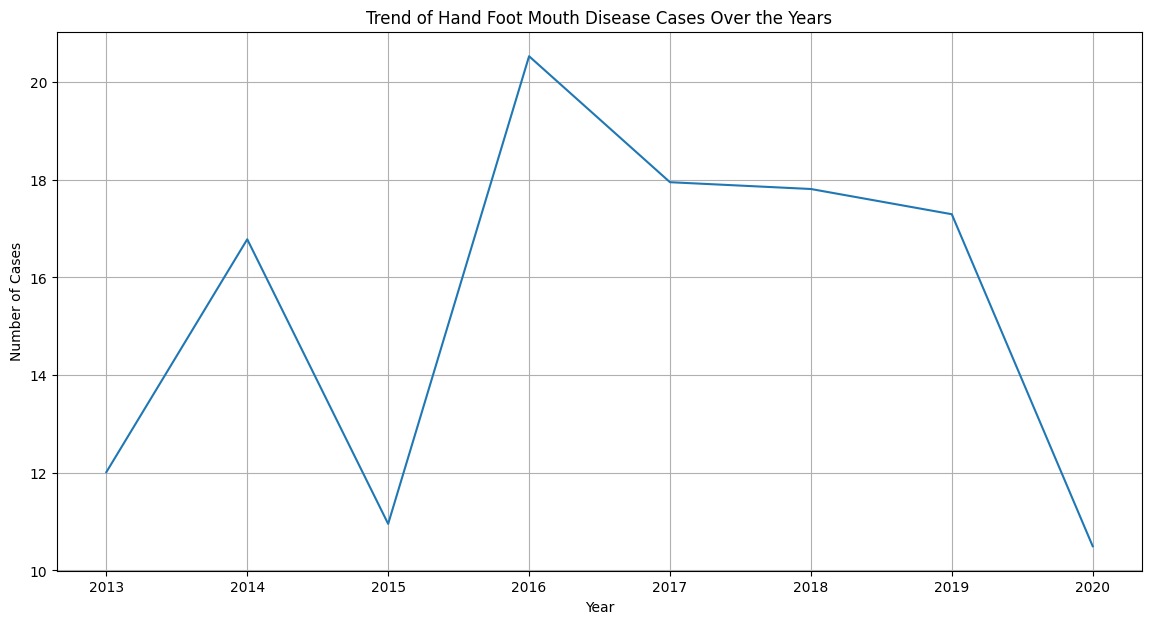

In [20]:
# Trend of cases over the years
plt.figure(figsize=(14, 7))
sns.lineplot(data=train_df, x='Year', y='Count', ci=None)
plt.title('Trend of Hand Foot Mouth Disease Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid()
plt.show()

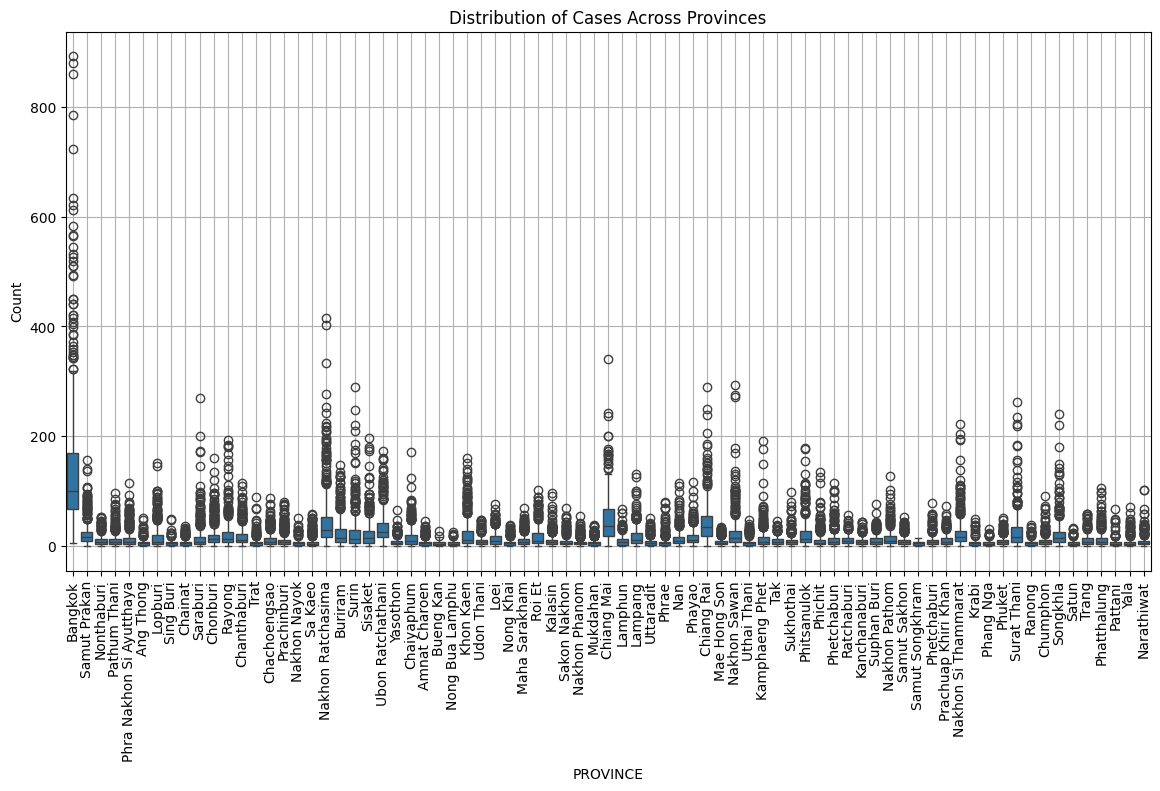

In [22]:
# Distribution of cases across different provinces
plt.figure(figsize=(14, 7))
sns.boxplot(data=train_df, x='PROVINCE', y='Count')
plt.title('Distribution of Cases Across Provinces')
plt.grid()
plt.xticks(rotation=90)
plt.show()

<hr>

# Feature Engineer

In [23]:
train_df['WeekofYear'] = train_df['Year'] * 100 + train_df['Week_no']
train_df

,_id,Disease,Year,PROVINCE,Week_no,Count,WeekofYear
0,1,Hand Foot Mouth,2013,Bangkok,1,62.0,201301
1,2,Hand Foot Mouth,2013,Bangkok,2,95.0,201302
2,3,Hand Foot Mouth,2013,Bangkok,3,88.0,201303
3,4,Hand Foot Mouth,2013,Bangkok,4,86.0,201304
4,5,Hand Foot Mouth,2013,Bangkok,5,132.0,201305
...,...,...,...,...,...,...,...
32181,32182,Hand Foot Mouth,2020,Narathiwat,48,2.0,202048
32182,32183,Hand Foot Mouth,2020,Narathiwat,49,1.0,202049
32183,32184,Hand Foot Mouth,2020,Narathiwat,50,2.0,202050
32184,32185,Hand Foot Mouth,2020,Narathiwat,51,2.0,202051


In [24]:
# create lag feature
train_df['Lag_1'] = train_df.groupby('WeekofYear')['Count'].shift(1)
train_df['Lag_2'] = train_df.groupby('PROVINCE')['Count'].shift(2)
train_df['Lag_3'] = train_df.groupby('PROVINCE')['Count'].shift(3)

In [26]:
# Fill NaN values created by lag features
train_df.fillna(0, inplace=True)

In [27]:
train_df

,_id,Disease,Year,PROVINCE,Week_no,Count,WeekofYear,Lag_1,Lag_2,Lag_3
0,1,Hand Foot Mouth,2013,Bangkok,1,62.0,201301,0.0,0.0,0.0
1,2,Hand Foot Mouth,2013,Bangkok,2,95.0,201302,0.0,0.0,0.0
2,3,Hand Foot Mouth,2013,Bangkok,3,88.0,201303,0.0,62.0,0.0
3,4,Hand Foot Mouth,2013,Bangkok,4,86.0,201304,0.0,95.0,62.0
4,5,Hand Foot Mouth,2013,Bangkok,5,132.0,201305,0.0,88.0,95.0
...,...,...,...,...,...,...,...,...,...,...
32181,32182,Hand Foot Mouth,2020,Narathiwat,48,2.0,202048,6.0,1.0,6.0
32182,32183,Hand Foot Mouth,2020,Narathiwat,49,1.0,202049,1.0,2.0,1.0
32183,32184,Hand Foot Mouth,2020,Narathiwat,50,2.0,202050,8.0,2.0,2.0
32184,32185,Hand Foot Mouth,2020,Narathiwat,51,2.0,202051,3.0,1.0,2.0


# Model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [29]:
# Split the dataset
X = train_df[['Year', 'PROVINCE', 'Week_no', 'WeekofYear', 'Lag_1', 'Lag_2', 'Lag_3']]
X = pd.get_dummies(X, columns=['PROVINCE'])  # One-hot encode the province column
y = train_df['Count']

In [30]:
X

,Year,Week_no,WeekofYear,Lag_1,Lag_2,Lag_3,PROVINCE_Amnat Charoen,PROVINCE_Ang Thong,PROVINCE_Bangkok,PROVINCE_Bueng Kan,...,PROVINCE_Surin,PROVINCE_Tak,PROVINCE_Trang,PROVINCE_Trat,PROVINCE_Ubon Ratchathani,PROVINCE_Udon Thani,PROVINCE_Uthai Thani,PROVINCE_Uttaradit,PROVINCE_Yala,PROVINCE_Yasothon
0,2013,1,201301,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2013,2,201302,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2013,3,201303,0.0,62.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2013,4,201304,0.0,95.0,62.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2013,5,201305,0.0,88.0,95.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32181,2020,48,202048,6.0,1.0,6.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32182,2020,49,202049,1.0,2.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32183,2020,50,202050,8.0,2.0,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32184,2020,51,202051,3.0,1.0,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Train a RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Predict and evaluate
y_pred = model.predict(X_val)
rms = np.sqrt(mean_squared_error(y_val, y_pred))
rms

12.476295272425995

In [35]:
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [36]:
LightGMB_model = lgb.LGBMClassifier()
LightGMB_model.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

LGBMClassifier()

In [37]:
y_pred = LightGMB_model.predict(X_val)
rms = np.sqrt(mean_squared_error(y_val, y_pred))
rms

33.144111887973374

<hr>

In [38]:
!pip install autogluon.tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source

In [39]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [43]:
# Combine the training features and target variable into a single DataFrame
train_data = X_train.copy()
train_data['Count'] = y_train

# Combine the validation features and target variable into a single DataFrame for evaluation
val_data = X_val.copy()
val_data['Count'] = y_val

# Initialize and train the AutoGluon predictor
predictor = TabularPredictor(label='Count').fit(train_data)

# Evaluate the predictor on the validation data
predictor.leaderboard(val_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,0.144765,0.158601,accuracy,0.145873,0.027027,55.259274,0.145873,0.027027,55.259274,1,True,11
1,WeightedEnsemble_L2,0.141814,0.160634,accuracy,9.485387,3.277827,109.336862,0.034950,0.002288,1.060367,2,True,13
2,RandomForestEntr,0.141504,0.119154,accuracy,7.763312,0.221274,8.953966,7.763312,0.221274,8.953966,1,True,7
3,ExtraTreesGini,0.140882,0.130948,accuracy,7.861363,0.288234,6.081003,7.861363,0.288234,6.081003,1,True,8
4,ExtraTreesEntr,0.139484,0.134201,accuracy,7.216596,0.233155,6.089092,7.216596,0.233155,6.089092,1,True,9
5,RandomForestGini,0.138863,0.124441,accuracy,6.845285,0.311968,8.950157,6.845285,0.311968,8.950157,1,True,6
6,XGBoost,0.137931,0.135421,accuracy,14.216008,5.340085,74.379967,14.216008,5.340085,74.379967,1,True,10
7,LightGBMXT,0.134980,0.141521,accuracy,9.304564,3.248512,53.017220,9.304564,3.248512,53.017220,1,True,4
8,NeuralNetFastAI,0.134358,0.138268,accuracy,0.210914,0.075660,52.469718,0.210914,0.075660,52.469718,1,True,3
9,LightGBM,0.134203,0.137861,accuracy,0.729766,0.229247,25.273683,0.729766,0.229247,25.273683,1,True,5


In [ ]:
# Get predictions from the best model
y_pred = predictor.predict(X_val)

# Calculate RMS for the best model
rms = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMS for the best model: {rms}")

In [46]:
# Make predictions on the validation set
predictions = predictor.predict(X_val, model='NeuralNetTorch')

# Display the predictions
print(predictions)

RMS for the best model: 22.391077695375905


# Predicted

In [48]:
# Prepare the test set features
X_test = test_df[['Year', 'PROVINCE', 'Week_no', 'WeekofYear', 'Lag_1', 'Lag_2', 'Lag_3']]
X_test = pd.get_dummies(X_test, columns=['PROVINCE'])  # One-hot encode the province column

# Predict the counts for the test set
test_predictions = predictor.predict(X_test)

# Prepare the submission file
sample_submission['Count'] = test_predictions

# Save the submission file
sample_submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully.")

KeyError: "['WeekofYear', 'Lag_1', 'Lag_2', 'Lag_3'] not in index"

In [50]:
test_df.columns

Index(['_id', 'Disease', 'Year', 'PROVINCE', 'Week_no'], dtype='object')